In [1]:
#Anaconda prompt command to increase data rate limit
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '09ad8618-af91-423d-8c31-1d953676ef71',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-11-09T13:46:54.736Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 8822}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10542, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
#create data frame
import pandas as pd

df = pd.json_normalize(data['data'])

In [3]:
#create timestamp column
df['timestamp'] = pd.to_datetime('now', utc = True)

In [10]:
def get_coin_data():
    
    global df
    
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '09ad8618-af91-423d-8c31-1d953676ef71',
    }

    session = Session()
    session.headers.update(headers)
    
    #get data from api
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #create data frame
    import pandas as pd

    df2 = pd.json_normalize(data['data'])
    
    #create timestamp column
    df2['timestamp'] = pd.to_datetime('now', utc = True)
    
    #write new data to csv file
    if not os.path.isfile(r"C:\Users\Austin\Documents\Website\Projects\Python\CryptoCaps.csv"): 
        df.to_csv(r"C:\Users\Austin\Documents\Website\Projects\Python\CryptoCaps.csv", header = 'column_names')
    else:
        df.to_csv(r"C:\Users\Austin\Documents\Website\Projects\Python\CryptoCaps.csv", header = False, mode = 'a')

In [13]:
#create automation loop
import os
from time import time
from time import sleep

for i in range(333):
    get_coin_data()
    print('Retrieved Coin Data')
    sleep(60)
exit()

Retrieved Coin Data
Retrieved Coin Data


KeyboardInterrupt: 

In [14]:
new_df = pd.read_csv(r"C:\Users\Austin\Documents\Website\Projects\Python\CryptoCaps.csv")

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10542,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.953740e+07,...,52.3576,7.752567e+11,NaN,2023-11-09T13:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 13:46:56.002258+00:00
1,1,1027,Ethereum,ETH,ethereum,7740,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202666e+08,...,16.7292,2.303094e+11,NaN,2023-11-09T13:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 13:46:56.002258+00:00
2,2,825,Tether USDt,USDT,tether,65347,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.626396e+10,...,6.2666,8.868794e+10,NaN,2023-11-09T13:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-09 13:46:56.002258+00:00
3,3,1839,BNB,BNB,bnb,1750,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.517023e+08,...,2.7340,3.763840e+10,NaN,2023-11-09T13:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 13:46:56.002258+00:00
4,4,52,XRP,XRP,xrp,1136,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.361584e+10,...,2.6546,6.816201e+10,NaN,2023-11-09T13:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 13:46:56.002258+00:00


In [16]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 14
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   id                                  45 non-null     int64              
 1   name                                45 non-null     object             
 2   symbol                              45 non-null     object             
 3   slug                                45 non-null     object             
 4   num_market_pairs                    45 non-null     int64              
 5   date_added                          45 non-null     object             
 6   tags                                45 non-null     object             
 7   max_supply                          15 non-null     float64            
 8   circulating_supply                  45 non-null     float64            
 9   total_supply                        45 non-nu

In [76]:
percent_change_df = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [77]:
percent_change_df = percent_change_df.stack()
percent_change_df = percent_change_df.to_frame(name = 'percent')

In [78]:
percent_change_df.reset_index(inplace = True)
percent_change_df

,name,level_1,percent
0,Bitcoin,quote.USD.percent_change_1h,-0.06429
1,Bitcoin,quote.USD.percent_change_24h,4.51301
2,Bitcoin,quote.USD.percent_change_7d,5.81732
3,Bitcoin,quote.USD.percent_change_30d,34.95091
4,Bitcoin,quote.USD.percent_change_60d,43.20442
...,...,...,...
85,Wrapped Bitcoin,quote.USD.percent_change_24h,4.30279
86,Wrapped Bitcoin,quote.USD.percent_change_7d,5.13514
87,Wrapped Bitcoin,quote.USD.percent_change_30d,34.54431
88,Wrapped Bitcoin,quote.USD.percent_change_60d,42.89784


In [79]:
percent_change_df = percent_change_df.rename(columns = {'level_1' : 'timeframe', '0' : 'percent'})
percent_change_df.head()

,name,timeframe,percent
0,Bitcoin,quote.USD.percent_change_1h,-0.06429
1,Bitcoin,quote.USD.percent_change_24h,4.51301
2,Bitcoin,quote.USD.percent_change_7d,5.81732
3,Bitcoin,quote.USD.percent_change_30d,34.95091
4,Bitcoin,quote.USD.percent_change_60d,43.20442


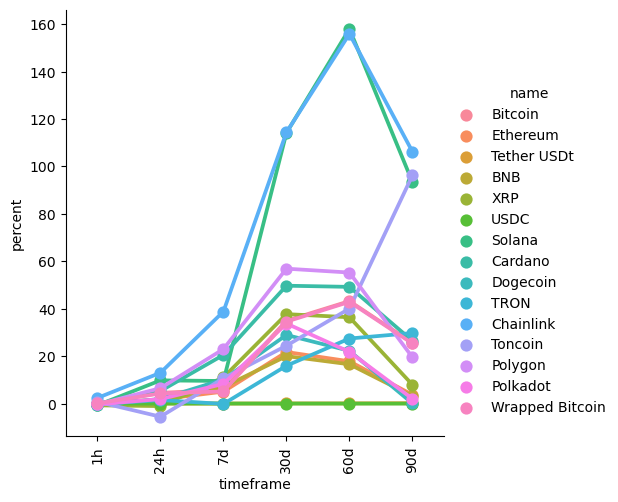

In [83]:
#plot percent changes over time for top 15 market cap coins
import matplotlib.pyplot as plt
import seaborn as sns

plot = sns.catplot(data = percent_change_df, x = 'timeframe', y = 'percent', hue = 'name', kind = 'point')
plt.xticks(rotation = 90)
plot.set_xticklabels(['1h', '24h', '7d', '30d', '60d', '90d'])
plt.show()

In [85]:
bitcoin_price_df = df[df['name'] == 'Bitcoin'][['quote.USD.price', 'timestamp']]
bitcoin_price_df

,quote.USD.price,timestamp
0,36916.98791,2023-11-09 13:46:56.002258+00:00
0,36943.11847,2023-11-09 13:46:56.513849+00:00
0,36973.96657,2023-11-09 13:47:56.859298+00:00


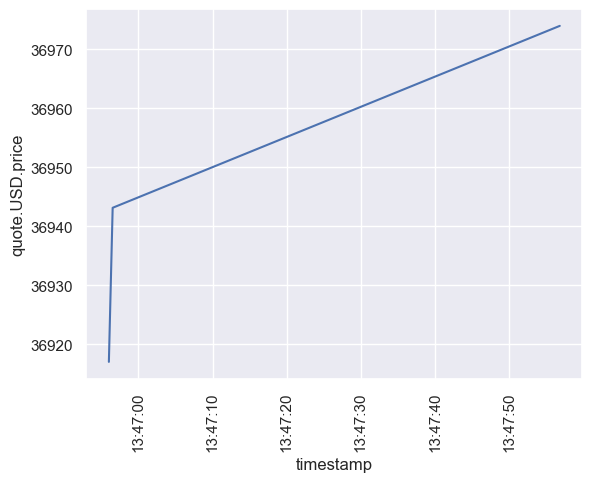

In [88]:
#plot price of bitcoin over time
sns.set_theme(style = 'darkgrid')
plot = sns.lineplot(bitcoin_price_df, x = 'timestamp', y = 'quote.USD.price')
plt.xticks(rotation = 90)
plt.show()